# Nothing But NumPy: A 2-layer Binary Classification Neural Network using Keras like BCE Cost function on XOR data

Part of the blog ["Nothing but NumPy: Understanding & Creating Binary Classification Neural Networks with Computational Graphs from Scratch"](https://medium.com/@rafayak/nothing-but-numpy-understanding-creating-binary-classification-neural-networks-with-e746423c8d5c)- by [Rafay Khan](https://twitter.com/RafayAK)

In this notebook we'll create a 2-layer nueral network (i.e. a single hidden and output layer) and train it on the XOR data using Keras-like Binary Cross-Entropy(BCE) Cost function.

First, let's import NumPy, our neural net Layers, the Keras-like Binary Cross-Entropy(bce) Cost function and helper functions.

_Feel free to look into the helper functions in the utils directory._

In [1]:
import numpy as np
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer
from util.utilities import *
from util.cost_functions import compute_keras_like_bce_cost  # <--- keras_like_BCE_cost

# to show all the generated plots inline in the notebook
%matplotlib inline

#### The XOR data:
![](imgs\XOR_data_n_plot.png)

In [2]:
# This is our XOR gate data 

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])


Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

Let's set up training data. Recall, data needs to be in $(features \times \text{number_of_examples})$ shape. So, we need to transpose X and Y.

In [3]:
X_train = X.T
Y_train = Y.T

In [4]:
X_train

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [5]:
Y_train

array([[0, 1, 1, 0]])

This is the neural net architecture we'll use

![](imgs\2in_2_layer_NN.png)

In [6]:
# define training constants
learning_rate = 5
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable
                  # (weights will now be initailzaed to the same pseudo-random numbers, each time)


# Our network architecture has the shape: 
#                   (input)--> [Linear->Sigmoid] -> [Linear->Sigmoid] -->(output)  

#------ LAYER-1 ----- define hidden layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=3, ini_type='plain')
A1 = SigmoidLayer(Z1.Z.shape)

#------ LAYER-2 ----- define output layer that takes in values from hidden layer
Z2= LinearLayer(input_shape=A1.A.shape, n_out= 1, ini_type='plain')
A2= SigmoidLayer(Z2.Z.shape)

Now we can start the training loop.

__Note__: _how we use the Keras-like BCE_

In [7]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    Z2.forward(A1.A)
    A2.forward(Z2.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dZ2 = compute_keras_like_bce_cost(Y=Y_train, P_hat=A2.A, from_logits=False) # <--- keras-like BCE
    
    # print and store Costs every 100 iterations and of the last iteration.
    if (epoch % 100) == 0:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ----------------------------
    
    Z2.backward(dZ2)
    
    A1.backward(Z2.dA_prev)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z2.update_params(learning_rate=learning_rate)
    Z1.update_params(learning_rate=learning_rate)

Cost at epoch#0: 0.6931474922816336
Cost at epoch#100: 0.6931416451454664
Cost at epoch#200: 0.6931243411332719
Cost at epoch#300: 0.6929352073520991
Cost at epoch#400: 0.461681176462355
Cost at epoch#500: 0.02527896260763793
Cost at epoch#600: 0.01014844046322547
Cost at epoch#700: 0.006226963834290263
Cost at epoch#800: 0.004463642981829087
Cost at epoch#900: 0.0034684949130358595
Cost at epoch#1000: 0.002831545218323767
Cost at epoch#1100: 0.0023897782772258416
Cost at epoch#1200: 0.0020658129611468247
Cost at epoch#1300: 0.001818290863784061
Cost at epoch#1400: 0.001623134859446165
Cost at epoch#1500: 0.0014653919961793572
Cost at epoch#1600: 0.0013352927718954424
Cost at epoch#1700: 0.0012261879933289702
Cost at epoch#1800: 0.0011333972255367407
Cost at epoch#1900: 0.0010535315615018822
Cost at epoch#2000: 0.0009840776206835305
Cost at epoch#2100: 0.000923132421928069
Cost at epoch#2200: 0.0008692289864343258
Cost at epoch#2300: 0.0008212184326730264
Cost at epoch#2400: 0.00077818

Now let's see how well the neural net peforms on the training data after the training as finished

`predict` helper functionin the cell below returns three things:

* `p`: predicted labels (output 1 if predictded output is greater than classification threshold `thresh`)
* `probas`: raw probabilities (how sure the neural net thinks the output is 1, this is just `P_hat`)
* `accuracy`: the number of correct predictions from total predictions

In [8]:
classifcation_thresh = 0.5


predicted_outputs, p_hat, accuracy = predict(X=X_train, Y=Y_train, 
                                             Zs=[Z1, Z2], As=[A1, A2], thresh=classifcation_thresh)

print("The predicted outputs of first 5 examples: \n{}".format(predicted_outputs[:,:5]))
print("The predicted prbabilities of first 5 examples:\n {}".format(np.round(p_hat[:, :5], decimals=3)) )
print("\nThe accuracy of the model is: {}%".format(accuracy))

The predicted outputs of first 5 examples: 
[[ 0.  1.  1.  0.]]
The predicted prbabilities of first 5 examples:
 [[ 0.  1.  1.  0.]]

The accuracy of the model is: 100.0%


#### The Learning Curve

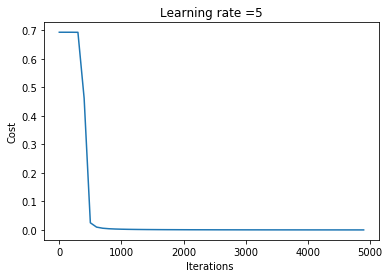

In [9]:
plot_learning_curve(costs, learning_rate, total_epochs=number_of_epochs)

#### The Decision Boundary

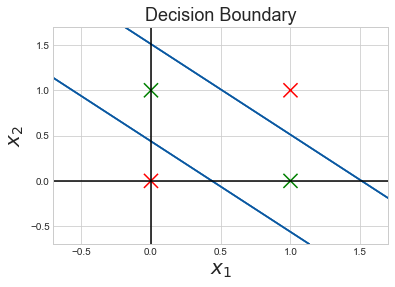

In [10]:
plot_decision_boundary(lambda x: predict_dec(Zs=[Z1, Z2], As=[A1, A2], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True)

#### The Shaded Decision Boundary

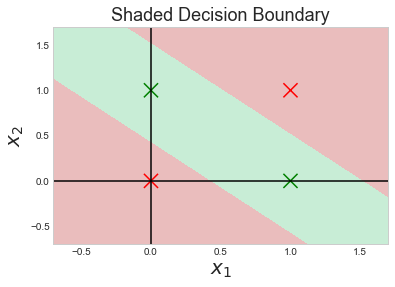

In [11]:
plot_decision_boundary_shaded(lambda x: predict_dec(Zs=[Z1, Z2], As=[A1, A2], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True)

#### The Decision Boundary with Shortest Distances

Play with the `classifcation_thresh` and visualize the effects

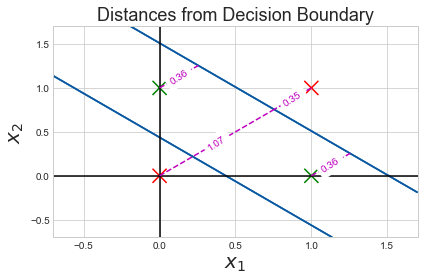

In [12]:
plot_decision_boundary_distances(lambda x: predict_dec(Zs=[Z1, Z2], As=[A1, A2], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True)

### Bonus

The learning_rate has been set very high, `learning_rate=5`. This is becuse the `plain` variant of the `param_initializer` sets weights to small gaussian values moving down the Loss/Cost curve requires big steps, at least initially. 

Try setting the `param_initializer='xavier'`(this controls the variance of weights depending on the number of neurons in the layer, so that the weights in a layer are neither to large or too small) and see how low you can set the `learning_rate` after `xavier` initialization.
